# Heart Disease Prediction model

**Problem:**

In this project, we delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score


%matplotlib inline

# 1.Data Collection

In [3]:
df=pd.read_csv('/content/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Dataset Description

## Context
This dataset dates back to 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains **76 attributes**, including the predicted attribute. However, all published experiments use a subset of **14 attributes**. The "target" field indicates the presence of heart disease in the patient, where:
- **0** = No disease
- **1** = Disease

## Content

### Attribute Information
1. **age**: Age of the patient
2. **sex**: Gender of the patient
3. **chest pain type**: (4 values)
4. **resting blood pressure**: Blood pressure while at rest
5. **serum cholestoral**: Cholesterol level in mg/dl
6. **fasting blood sugar**: > 120 mg/dl (1 = true; 0 = false)
7. **resting electrocardiographic results**: Values 0, 1, 2
8. **maximum heart rate achieved**
9. **exercise induced angina**: (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: The slope of the peak exercise ST segment
12. **number of major vessels**: (0-3) colored by fluoroscopy
13. **thal**:  
    - 0 = Normal  
    - 1 = Fixed defect  
    - 2 = Reversible defect

   ## Dataset Link
   
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download


In [5]:
df.shape

(1025, 14)

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# No Null rows are present and all the columns are numeric .Lets dig deeper.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
for i in ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']:
    df[i] = df[i].astype('object')



In [10]:
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object


In [11]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
categorical_features = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[categorical_features] = df[categorical_features].astype('object')

In [12]:
df_continuous=df[continuous_features]
df_categorical=df[categorical_features]

In [13]:
df_continuous.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


# 2. Data Cleaning Steps

## Identify Row with duplicate data

In [14]:
duplicate = df[df.duplicated()]
print(f"Duplicate rows present in the dataset are: {duplicate}")
duplicate.head()

Duplicate rows present in the dataset are:       age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope ca  \
15     34   0  1       118   210   0       1      192     0      0.7     2  0   
31     50   0  1       120   244   0       1      162     0      1.1     2  0   
43     46   1  0       120   249   0       0      144     0      0.8     2  0   
55     55   1  0       140   217   0       1      111     1      5.6     0  0   
61     66   0  2       146   278   0       0      152     0      0.0     1  1   
...   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ... ..   
1020   59   1  1       140   221   0       1      164     1      0.0     2  0   
1021   60   1  0       125   258   0       0      141     1      2.8     1  1   
1022   47   1  0       110   275   0       0      118     1      1.0     1  1   
1023   50   0  0       110   254   0       0      159     0      0.0     2  0   
1024   54   1  0       120   188   0       1      113     0      1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [15]:
df=df.drop_duplicates()

In [16]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [17]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,302,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,206,143,257,151,203,141,175,165,164


In [18]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


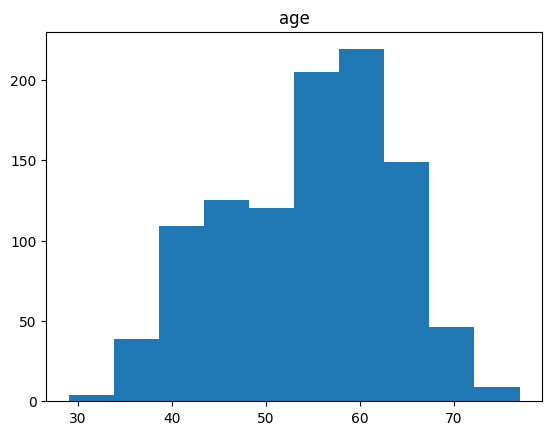

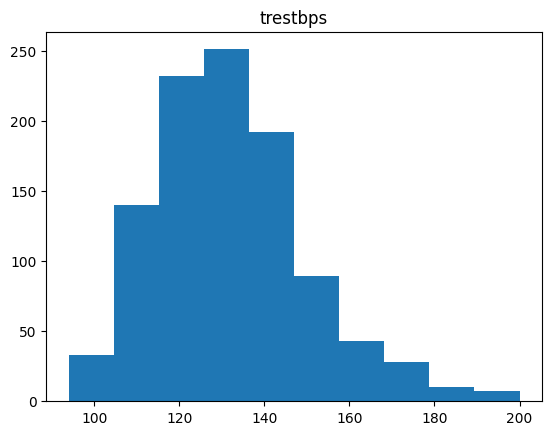

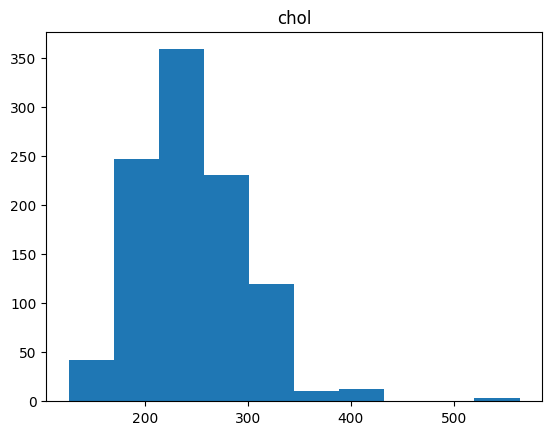

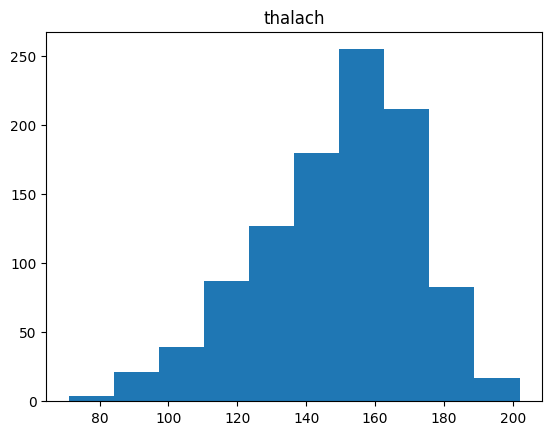

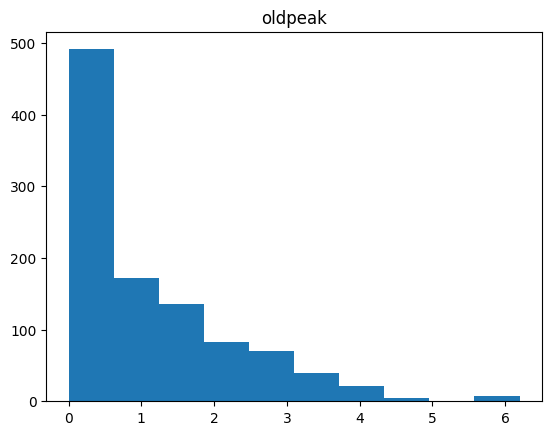

In [19]:
for i in df_continuous:
    plt.hist(df_continuous[i])
    plt.title(i)
    plt.show()

In [20]:
for i in df_continuous.columns:
    skewness=3*(df[i].mean()-df[i].median())/df[i].std()
    print(f'Skewness of column {i} is {skewness}')

Skewness of column age is -0.3579157188682661
Skewness of column trestbps is 0.273748169453764
Skewness of column chol is 0.3478026403154064
Skewness of column thalach is -0.3838444022948768
Skewness of column oldpeak is 0.6277821996766025


In [21]:
for i in df_categorical.columns:
    print(df_categorical[i].value_counts())

sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
fbs
0    872
1    153
Name: count, dtype: int64
restecg
1    513
0    497
2     15
Name: count, dtype: int64
exang
0    680
1    345
Name: count, dtype: int64
slope
1    482
2    469
0     74
Name: count, dtype: int64
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64
target
1    526
0    499
Name: count, dtype: int64


In [22]:
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    print(x,y)

0 0
0 1
0 2
1 0
1 1


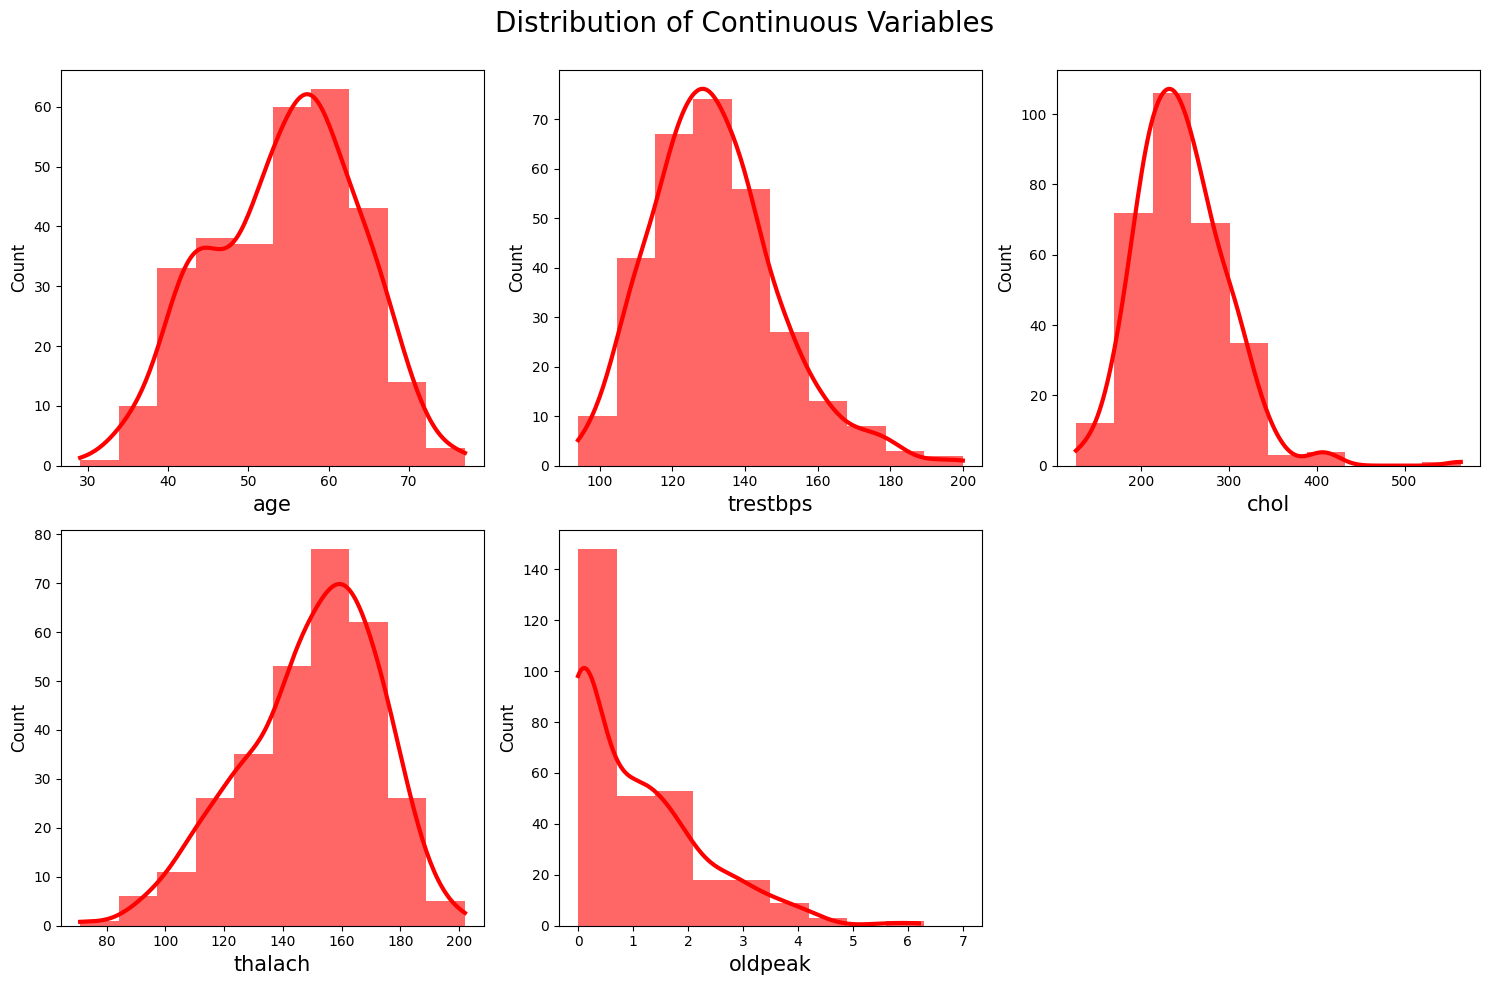

In [23]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

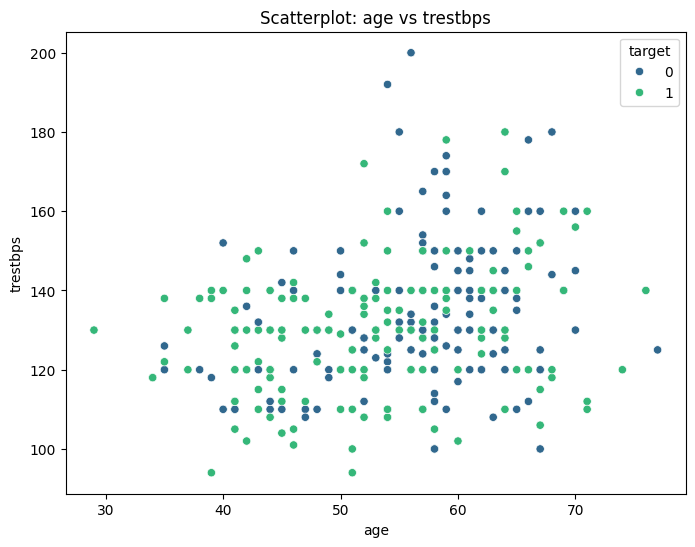

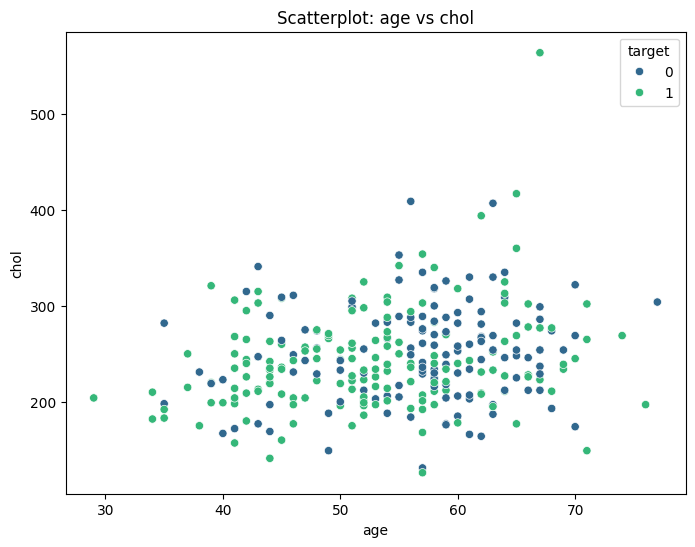

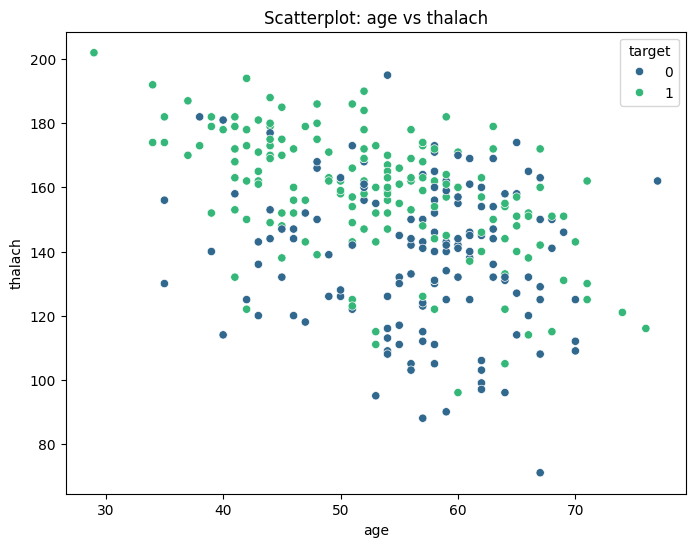

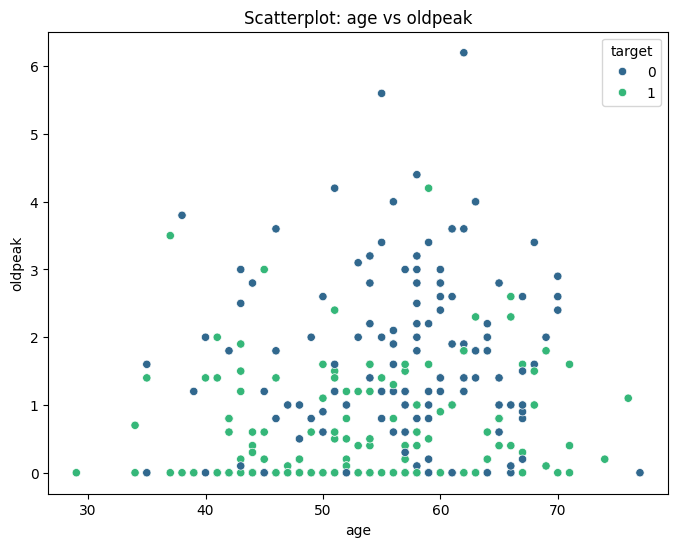

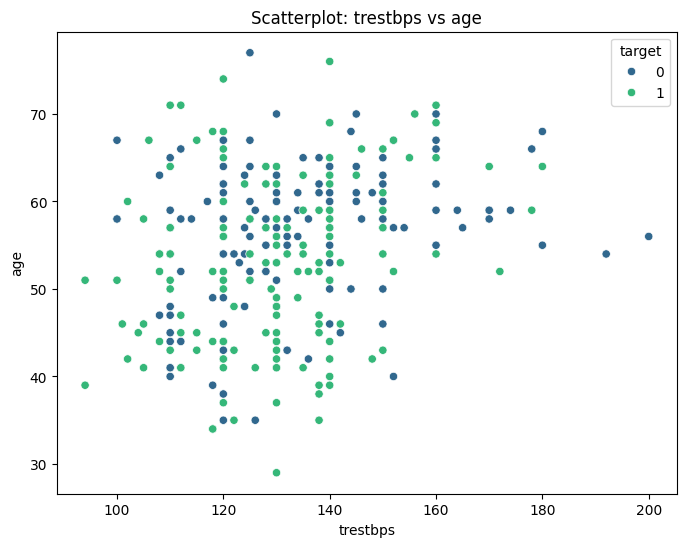

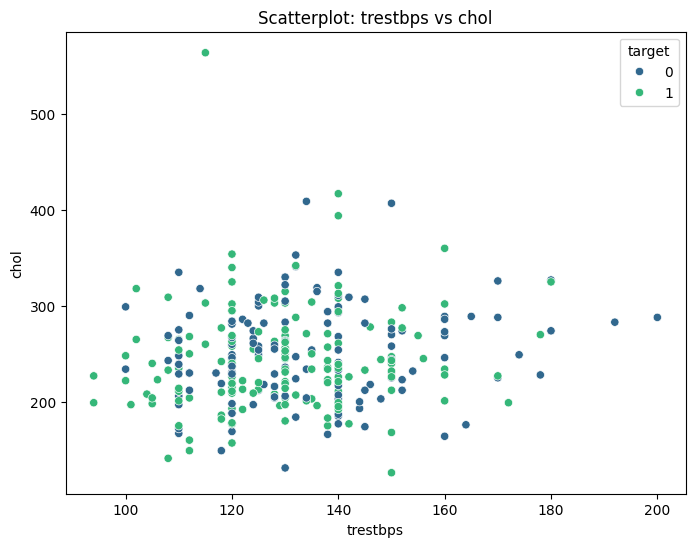

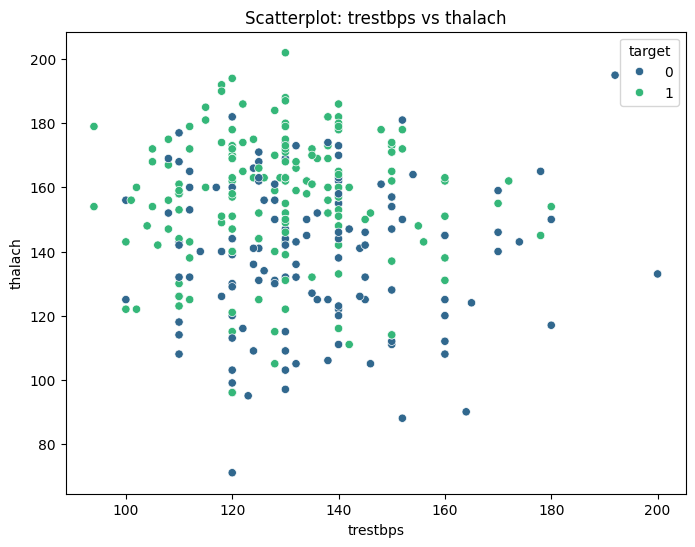

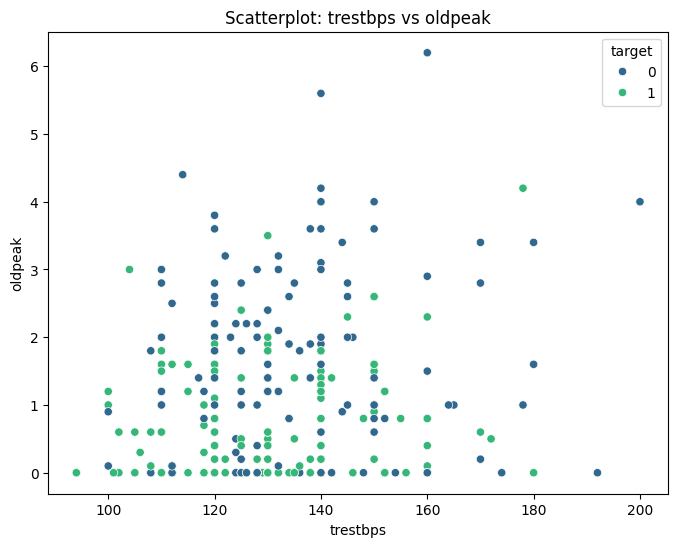

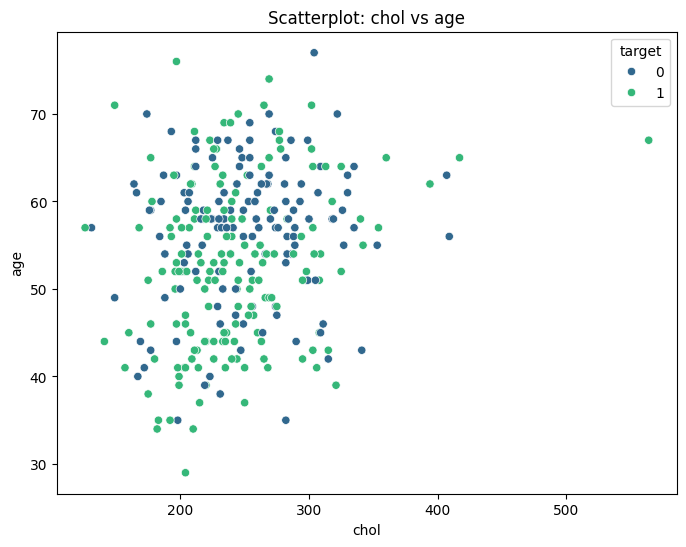

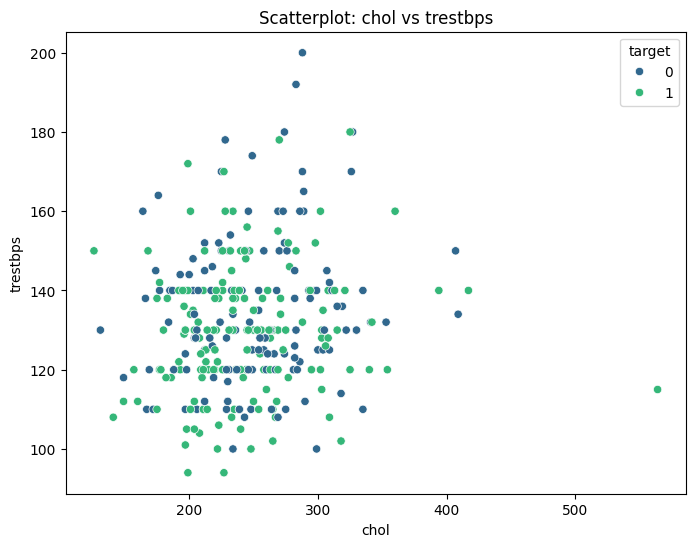

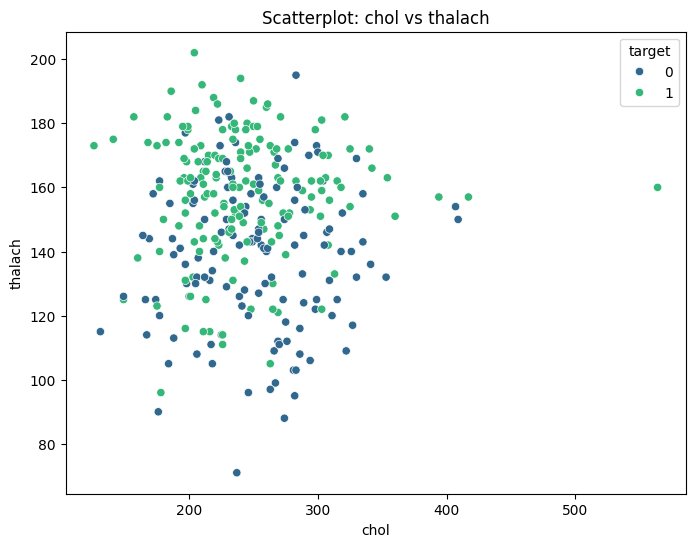

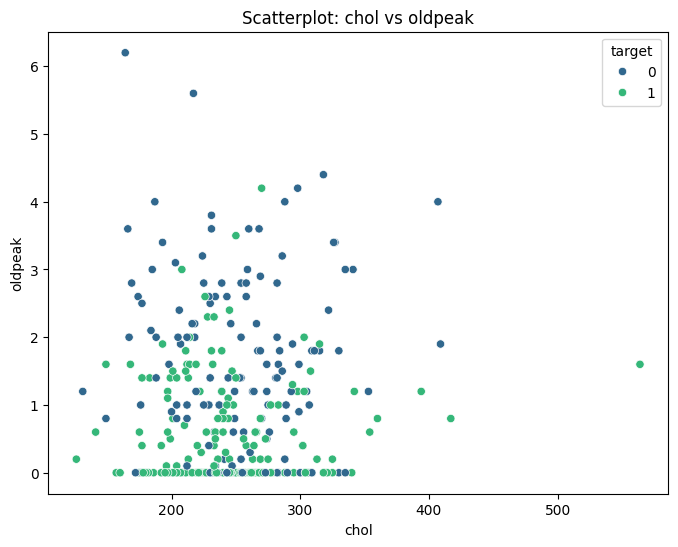

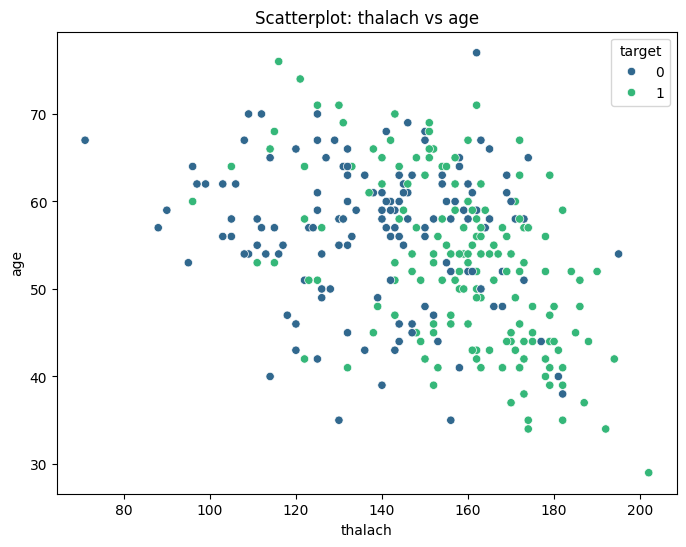

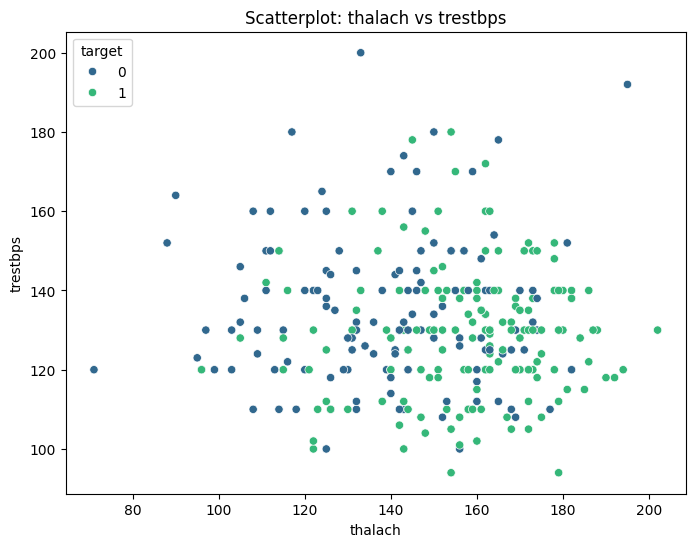

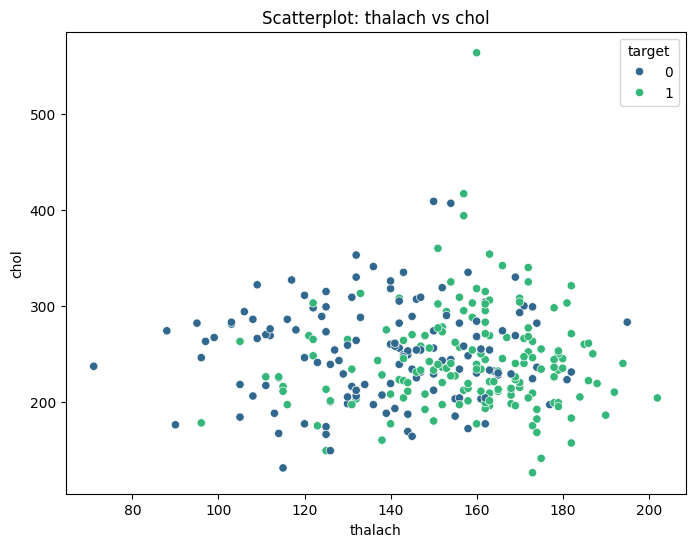

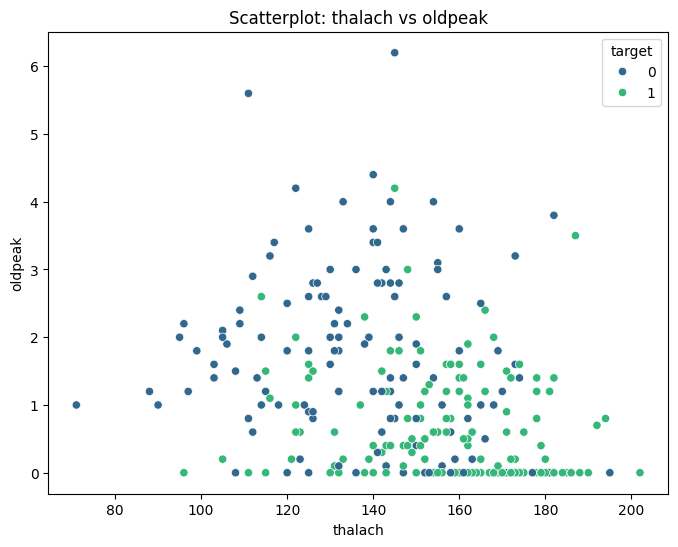

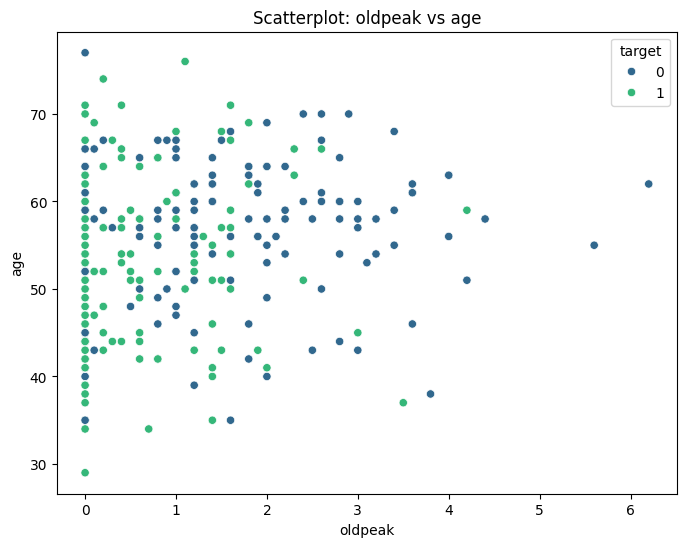

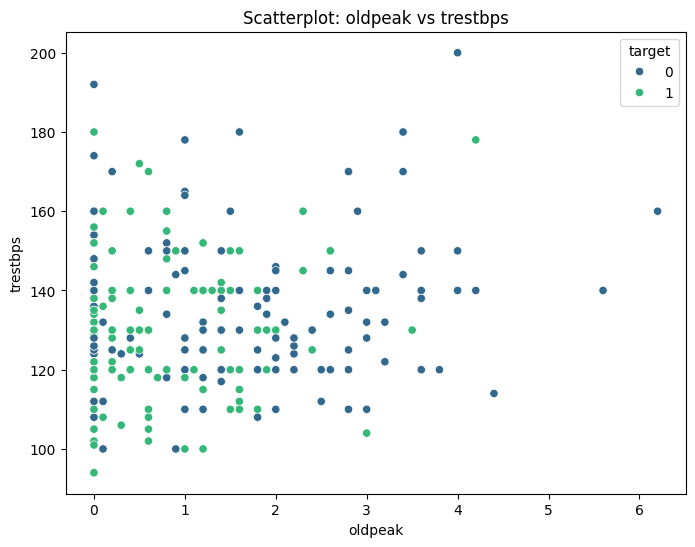

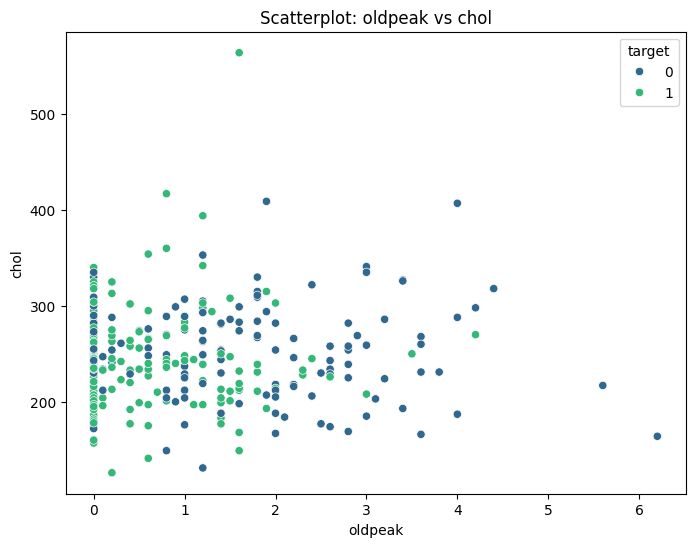

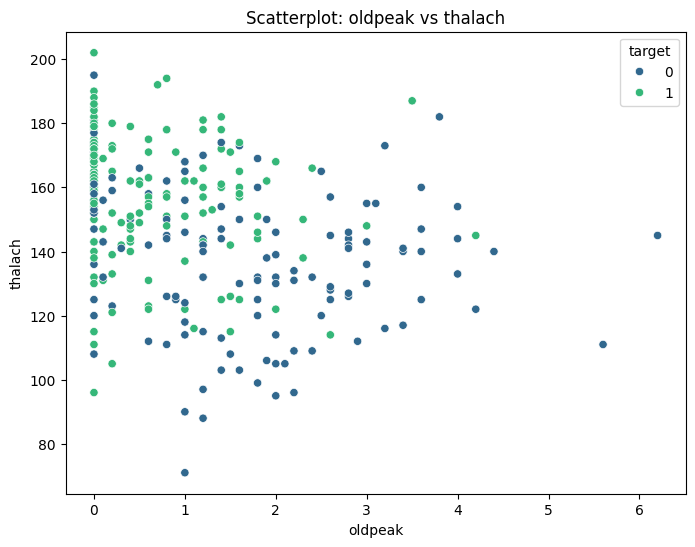

In [24]:
for i, x_feature in enumerate(continuous_features):
    for j, y_feature in enumerate(continuous_features):
        if x_feature != y_feature:  # Avoid plotting x vs. x
            plt.figure(figsize=(8, 6))
            sns.scatterplot(
                data=df,
                x=x_feature,
                y=y_feature,
                hue='target',
                sizes=(20, 200),  # Adjust bubble size range
                legend=True,
                palette='viridis'
            )
            plt.title(f'Scatterplot: {x_feature} vs {y_feature}')
            plt.show()

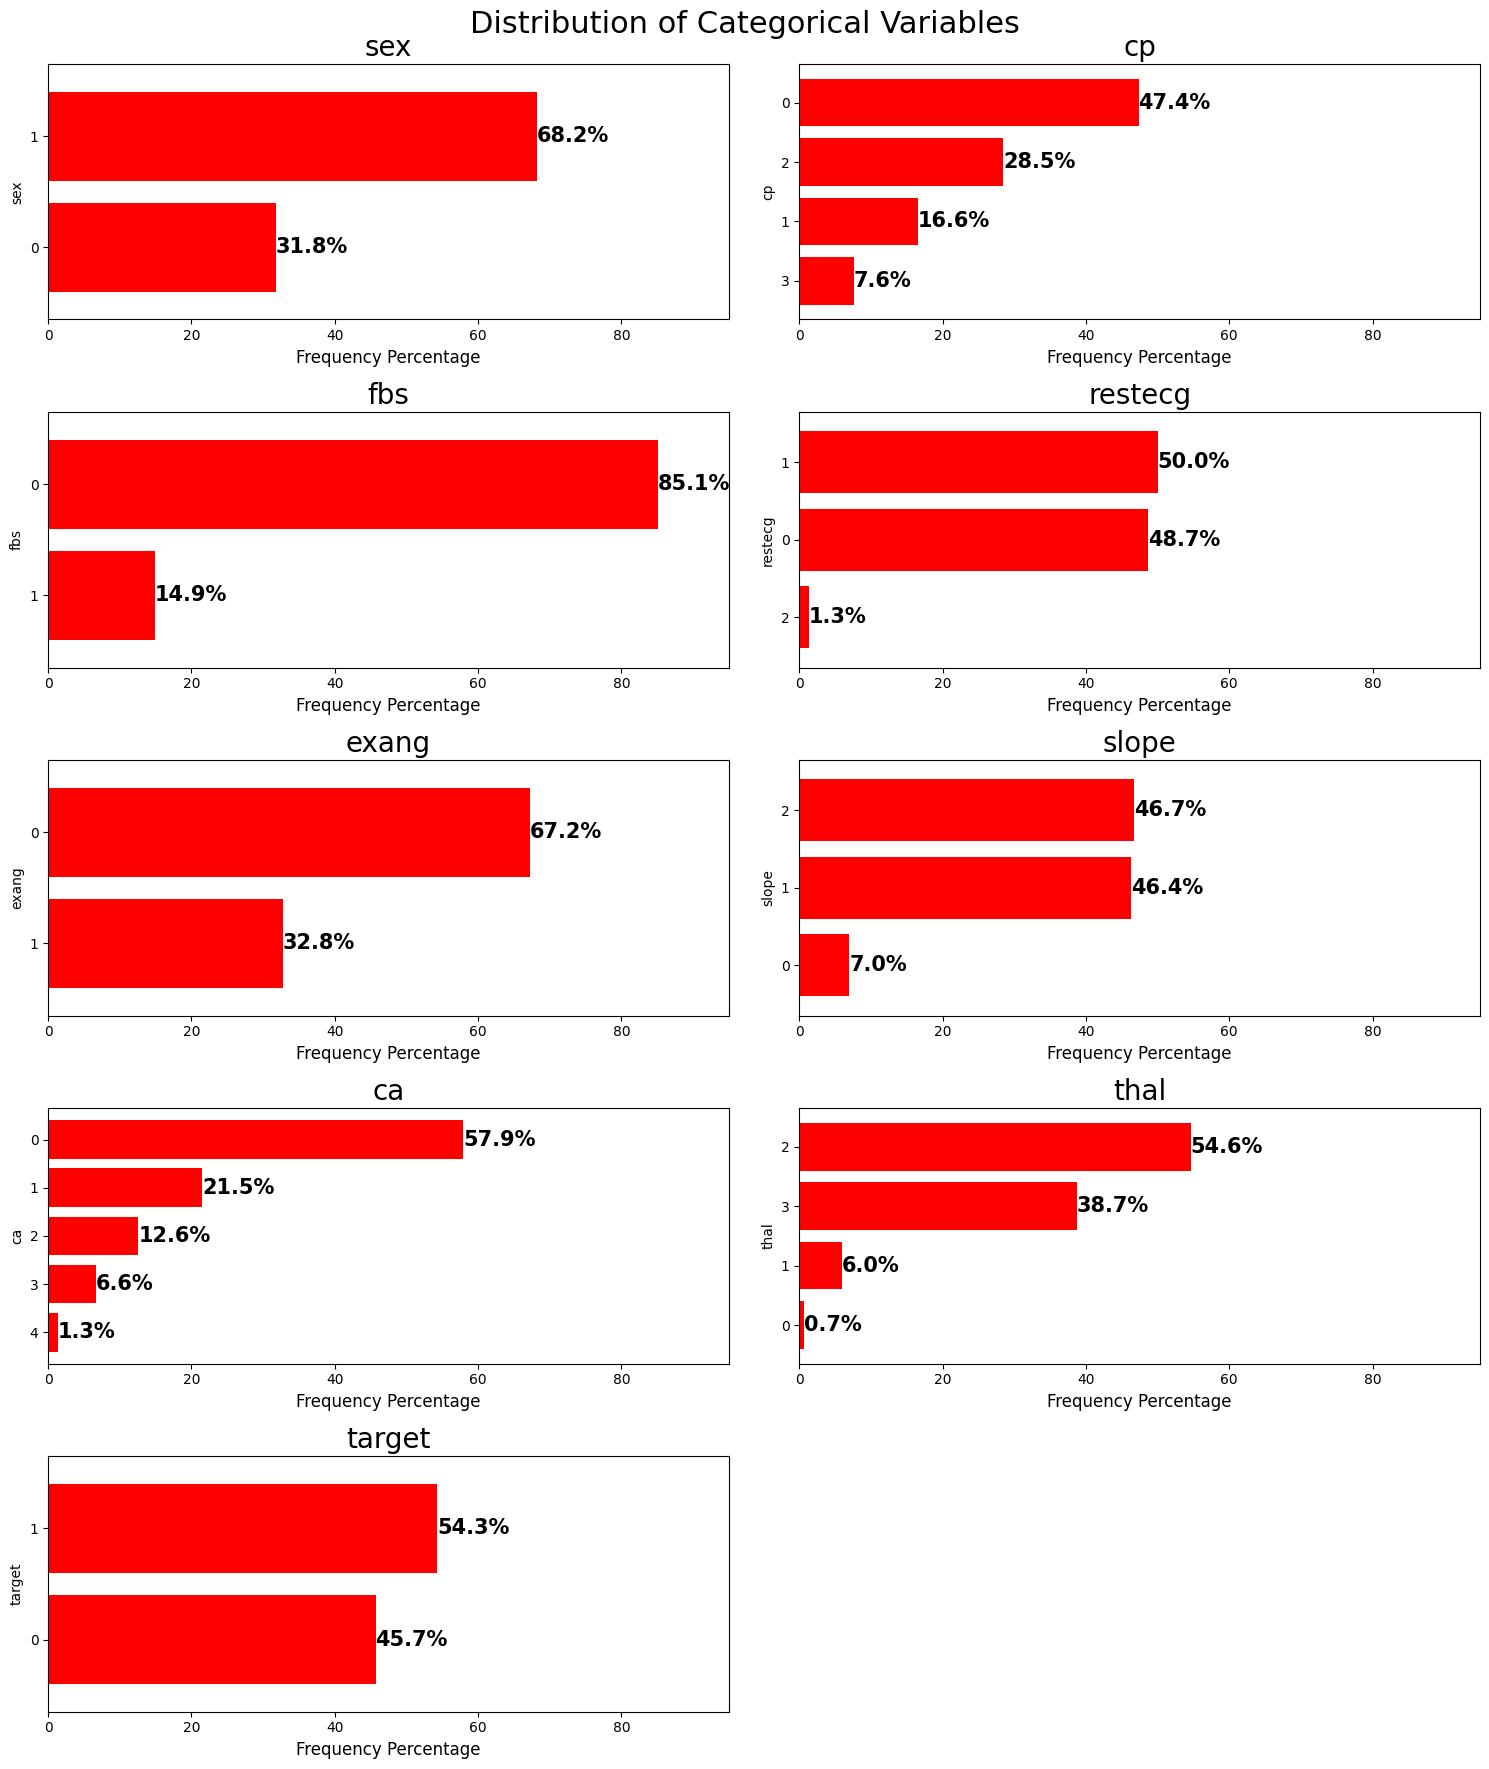

In [25]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

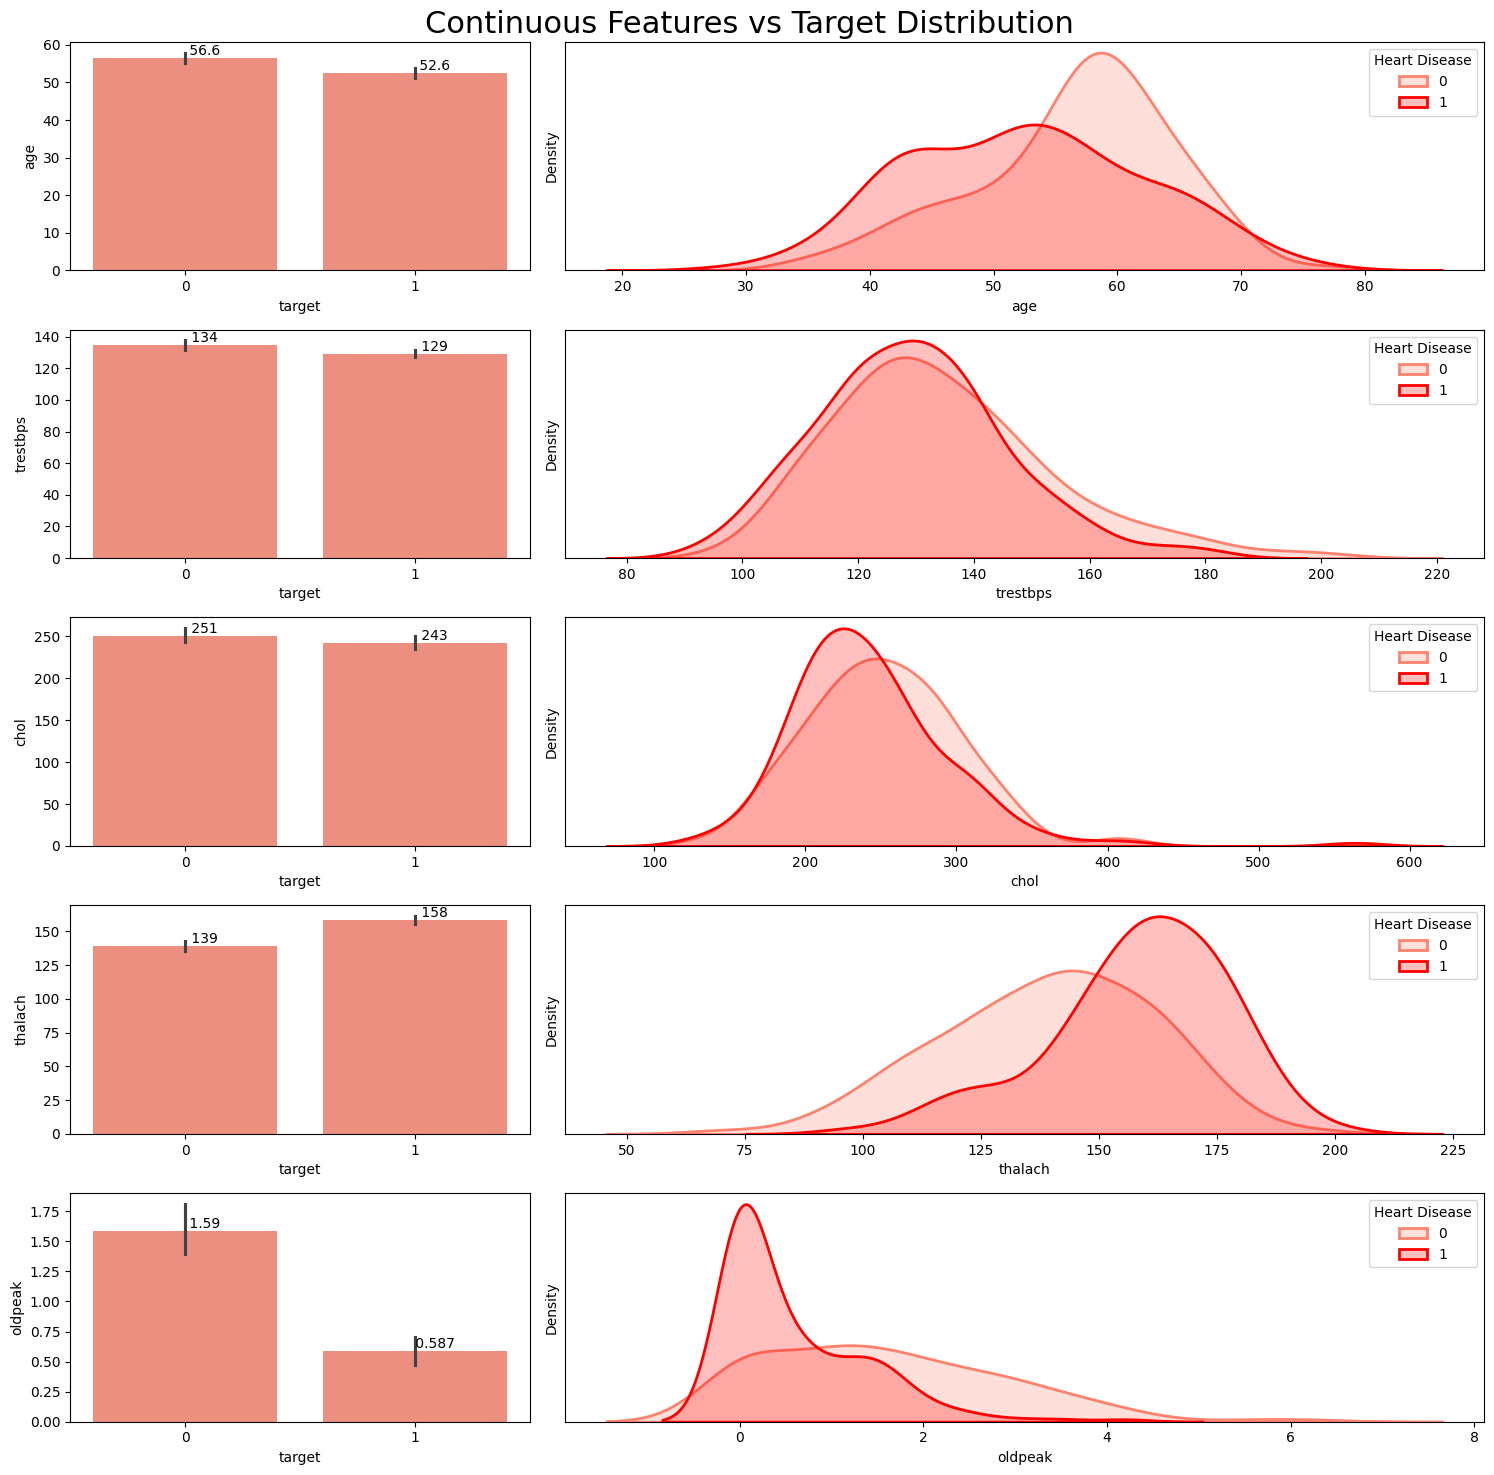

In [26]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

In [27]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64
ca,int64


# Model Building

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [30]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,False,False,False,True,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1,False,False,False,True,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,3,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,115,0,1.5,1,0,False,True,False,False,False,False,True,False
733,44,0,108,141,0,175,0,0.6,1,0,False,True,False,True,False,False,True,False
739,52,1,128,255,0,161,1,0.0,2,1,False,False,False,True,False,False,False,True
843,59,1,160,273,0,125,0,0.0,2,0,False,False,True,False,False,False,True,False


In [31]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


In [32]:
# Step 1: Split data into training (70%) and temporary (30%) datasets
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42)

# Step 2: Split the temporary dataset equally for validation (15%) and test (15%) datasets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [33]:
X_train, y_train = train_data.drop("target", axis=1), train_data['target']
X_val, y_val = val_data.drop("target", axis=1), val_data['target']
X_test, y_test = test_data.drop("target", axis=1), test_data['target']

##Logistic Regression Implementation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate and train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate Logistic Regression on the test set
y_pred_lr = lr_model.predict(X_test)

# Print evaluation metrics
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        27
           1       0.75      0.95      0.84        19

    accuracy                           0.85        46
   macro avg       0.85      0.86      0.85        46
weighted avg       0.87      0.85      0.85        46

Accuracy: 0.8478260869565217


##Deep Neural Network (DNN) Implementation with PyTorch

In [48]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# Ensure boolean columns are cast to integers
df = df.copy()
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Separate features and target
X = df.drop(columns='target')
y = df['target']

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert all columns to numeric (if not already numeric)
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.astype(np.float32), dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values.astype(np.float32), dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.astype(np.float32), dtype=torch.float32).view(-1, 1)


print("Data successfully converted to tensors!")

# Define the DNN model
class HeartDiseaseModel(nn.Module):
    def __init__(self):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate the model
dnn_model = HeartDiseaseModel()

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(dnn_model.parameters(), lr=0.001)

# Train the model
epochs = 50
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    dnn_model.train()
    epoch_loss = 0.0
    for batch in train_loader:
        X_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = dnn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Evaluate on the validation set
    dnn_model.eval()
    with torch.no_grad():
        val_outputs = dnn_model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_loss / len(train_loader):.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the DNN on the test set
dnn_model.eval()
with torch.no_grad():
    y_pred_dnn = (dnn_model(X_test_tensor).numpy() > 0.5).astype(int)
    y_test_dnn = y_test_tensor.numpy()

# Print evaluation metrics
print("Deep Neural Network Performance:")
print(classification_report(y_test_dnn, y_pred_dnn))
print(f"Accuracy: {accuracy_score(y_test_dnn, y_pred_dnn):.4f}")


Data successfully converted to tensors!
Epoch 1/50, Train Loss: 2.5738, Validation Loss: 0.8800
Epoch 2/50, Train Loss: 0.8806, Validation Loss: 1.1323
Epoch 3/50, Train Loss: 1.0387, Validation Loss: 0.8931
Epoch 4/50, Train Loss: 0.6697, Validation Loss: 0.6583
Epoch 5/50, Train Loss: 0.6915, Validation Loss: 0.6925
Epoch 6/50, Train Loss: 0.6662, Validation Loss: 0.6523
Epoch 7/50, Train Loss: 0.6282, Validation Loss: 0.6833
Epoch 8/50, Train Loss: 0.6188, Validation Loss: 0.6392
Epoch 9/50, Train Loss: 0.6167, Validation Loss: 0.6392
Epoch 10/50, Train Loss: 0.6033, Validation Loss: 0.6438
Epoch 11/50, Train Loss: 0.5956, Validation Loss: 0.6459
Epoch 12/50, Train Loss: 0.6095, Validation Loss: 0.6328
Epoch 13/50, Train Loss: 0.5921, Validation Loss: 0.6533
Epoch 14/50, Train Loss: 0.5917, Validation Loss: 0.6338
Epoch 15/50, Train Loss: 0.5823, Validation Loss: 0.6356
Epoch 16/50, Train Loss: 0.5692, Validation Loss: 0.6403
Epoch 17/50, Train Loss: 0.5778, Validation Loss: 0.6327


### Observations:

1. **Logistic Regression Performance:**
   - **Precision**:
     - Class 0: 0.95
     - Class 1: 0.75
     - Class 0 has a high precision, while Class 1 has a lower precision.
   - **Recall**:
     - Class 0: 0.78
     - Class 1: 0.95
     - Class 1 has a much higher recall, indicating better identification of Class 1 instances.
   - **F1-Score**:
     - Class 0: 0.86
     - Class 1: 0.84
     - Both classes have similar F1-scores, showing balanced performance for both classes.
   - **Accuracy**: 85%
     - The logistic regression model shows strong overall accuracy.

2. **Deep Neural Network (DNN) Performance:**
   - **Precision**:
     - Class 0: 0.81
     - Class 1: 0.70
     - The DNN model has lower precision than logistic regression, especially for Class 1.
   - **Recall**:
     - Class 0: 0.74
     - Class 1: 0.78
     - The DNN is better at identifying Class 1 but struggles with Class 0.
   - **F1-Score**:
     - Class 0: 0.77
     - Class 1: 0.74
     - The F1-scores are lower for the DNN compared to logistic regression but are relatively balanced between the classes.
   - **Accuracy**: 75%
     - The DNN model shows lower accuracy than logistic regression, indicating less overall effectiveness on this dataset.

3. **Comparison:**
   - **Accuracy**: Logistic regression outperforms the DNN with an accuracy of 85% vs. 75%.
   - **Precision and Recall**: Logistic regression shows higher precision and balanced recall, while the DNN has a lower precision but a higher recall for Class 1.
   - **F1-Score**: Logistic regression has a more balanced F1-score, while the DNN has slightly lower F1-scores for both classes.

### Conclusion:
The logistic regression model performs better than the deep neural network on this dataset, achieving higher accuracy and more balanced precision and recall. The DNN might need further tuning or a more complex dataset to outperform logistic regression.


##Prediction Using Best Performing Model(logistic regression )





In [62]:
# Example (assuming you've identified the missing features and their values)
X_new = [[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3, 0, 0, 0, 0, 0]]

# Make prediction using the Logistic Regression model
y_pred_new = lr_model.predict(X_new)

# Print the prediction result with a descriptive message
if y_pred_new[0] == 1:
    print("Prediction: Patient have Heart Disease ", y_pred_new)
else:
    print("Prediction:  Patient have No Heart Disease ", y_pred_new)




Prediction:  Patient have No Heart Disease  [0]
